In [36]:
import pandas as pd
import matplotlib.pyplot  as plt
import os
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split
from gluonts.torch import DeepAREstimator

In [37]:
dirname = os.path.join(os.path.abspath(os.curdir), 'underwork')

raw_data = {"3":(), "5":(), "8":(), "10":(), "14":(), "15":()}
for v in raw_data:
    tsdf_c = pd.read_csv(os.path.join(os.sep, dirname, v, 'calm_p.csv'))
    tsdf_w = pd.read_csv(os.path.join(os.sep, dirname, v,  'work_p.csv'))
    tsdf_m = pd.read_csv(os.path.join(os.sep, dirname, v, 'meta_p.csv'))
    raw_data[v] = (tsdf_c, tsdf_w, tsdf_m)

In [38]:
data = {"3":(), "5":(), "8":(), "10":(), "14":(), "15":()}

for v in raw_data:
    calm = raw_data[v][0]
    work = raw_data[v][1]
    sex = raw_data[v][2].iloc[0]["values"]
    weight = raw_data[v][2].iloc[1]["values"]
    height = raw_data[v][2].iloc[2]["values"]
    calm["sex"] = sex
    calm["weight"] = weight
    calm["height"] = height
    calm["state"] = 0
    work["sex"] = sex
    work["weight"] = weight
    work["height"] = height
    work["state"] = 1
    data[v] = (calm, work)

In [39]:
validation = {"25":(), "27":()}
for v in validation:
    calm = pd.read_csv(os.path.join(os.sep, dirname, v, 'calm_p.csv'))
    work = pd.read_csv(os.path.join(os.sep, dirname, v,  'work_p.csv'))
    tsdf_m = pd.read_csv(os.path.join(os.sep, dirname, v, 'meta_p.csv'))
    sex = tsdf_m.iloc[0]["values"]
    weight = tsdf_m.iloc[1]["values"]
    height = tsdf_m.iloc[2]["values"]
    calm["sex"] = sex
    calm["weight"] = weight
    calm["height"] = height
    calm["state"] = 0
    work["sex"] = sex
    work["weight"] = weight
    work["height"] = height
    work["state"] = 1
    validation[v] = (calm, work)

In [40]:
train_df = []
t = 0
ids = 0
for x in data:
    ids += len(data[x][0]["1"]) + len(data[x][1]["1"])
    train_df.extend([data[x][0]["1"], data[x][1]["1"]])
train_df = pd.DataFrame(pd.concat(train_df), columns=["1"])
train_df["time_indices"] = pd.to_datetime([*range(ids)], unit='s', origin=pd.Timestamp('2021-01-01 01:00:00', unit='s'))
train_df = train_df.set_index("time_indices").asfreq('S')
#train_df = pd.concat([train_df_ids, train_df_vals], axis=1)
'''validation_df = []
for x in validation:
    validation_df.extend([validation[x][0], validation[x][1]])
pd.concat(validation_df).to_csv("validation.csv", index_label="Time")'''
train_df

,1
time_indices,
2021-01-01 01:00:00,1.578218
2021-01-01 01:00:01,1.578611
2021-01-01 01:00:02,1.579003
2021-01-01 01:00:03,1.579003
2021-01-01 01:00:04,1.579003
...,...
2021-01-08 19:06:35,1.629587
2021-01-08 19:06:36,1.629587
2021-01-08 19:06:37,1.629587


In [41]:
#train = pd.read_csv("train.csv", index_col=1, parse_dates=True).filter(["Time", "1"])
#dataset = PandasDataset(train, target="1")
df = train_df.copy(deep=True)
train_df = PandasDataset(train_df, target="1", freq="S")
train_df

PandasDataset<size=1, freq=S, num_feat_dynamic_real=0, num_past_feat_dynamic_real=0, num_feat_static_real=0, num_feat_static_cat=0, static_cardinalities=[]>

In [42]:
training_data, test_gen = split(train_df, offset=-10000)
test_data = test_gen.generate_instances(prediction_length=10000, windows=1)


In [43]:
model = DeepAREstimator(
    prediction_length=10000, freq="S", trainer_kwargs={"max_epochs": 5}
).train(training_data)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


c:\Users\Иван\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.

  | Name  | Type        | Params | In sizes                                                               | Out sizes      
---------------------------------------------------------------------------------------------------------------------------------
0 | model | DeepARModel | 25.1 K | [[1, 1], [1, 1], [1, 10181, 7], [1, 10181], [1, 10181], [1, 10000, 7]] | [1, 100, 10000]
---------------------------------------------------------------------------------------------------------------------------------
25.1 K    Trainable params
0         Non-trainable params
25.1 K    Total params
0.100     Total estimated model params size (MB)


Epoch 0: |          | 50/? [09:12<00:00,  0.09it/s, v_num=7, train_loss=0.699]

Epoch 0, global step 50: 'train_loss' reached 0.69900 (best 0.69900), saving model to 'c:\\Users\\Иван\\Desktop\\time series\\ts13\\lightning_logs\\version_7\\checkpoints\\epoch=0-step=50.ckpt' as top 1


Epoch 1: |          | 50/? [09:12<00:00,  0.09it/s, v_num=7, train_loss=-.711]

Epoch 1, global step 100: 'train_loss' reached -0.71120 (best -0.71120), saving model to 'c:\\Users\\Иван\\Desktop\\time series\\ts13\\lightning_logs\\version_7\\checkpoints\\epoch=1-step=100.ckpt' as top 1


Epoch 2: |          | 50/? [08:54<00:00,  0.09it/s, v_num=7, train_loss=-.798]

Epoch 2, global step 150: 'train_loss' reached -0.79849 (best -0.79849), saving model to 'c:\\Users\\Иван\\Desktop\\time series\\ts13\\lightning_logs\\version_7\\checkpoints\\epoch=2-step=150.ckpt' as top 1


Epoch 3: |          | 50/? [09:04<00:00,  0.09it/s, v_num=7, train_loss=-1.18]

Epoch 3, global step 200: 'train_loss' reached -1.17682 (best -1.17682), saving model to 'c:\\Users\\Иван\\Desktop\\time series\\ts13\\lightning_logs\\version_7\\checkpoints\\epoch=3-step=200.ckpt' as top 1


Epoch 4: |          | 50/? [09:04<00:00,  0.09it/s, v_num=7, train_loss=-1.43]

Epoch 4, global step 250: 'train_loss' reached -1.42716 (best -1.42716), saving model to 'c:\\Users\\Иван\\Desktop\\time series\\ts13\\lightning_logs\\version_7\\checkpoints\\epoch=4-step=250.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: |          | 50/? [09:04<00:00,  0.09it/s, v_num=7, train_loss=-1.43]


In [44]:
forecasts = list(model.predict(test_data.input))

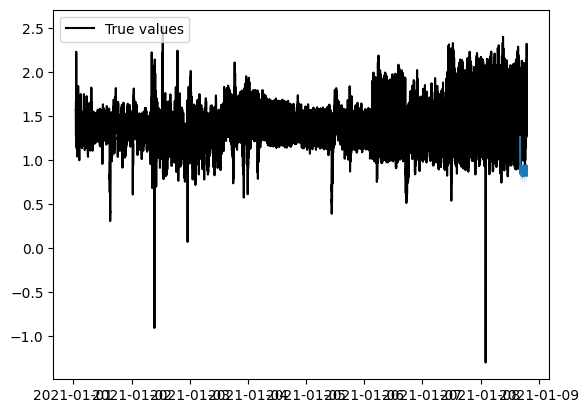

In [67]:
plt.plot(df["1"], color="black")
for forecast in forecasts:
  forecast.plot()
plt.legend(["True values"], loc="upper left")
plt.show()

In [46]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [71]:
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score)

true = list(df["1"])[-10000:]
pred = forecasts[-1].samples[-1]
print("MSE:", mean_squared_error(true, pred))
print("RMSE:", np.sqrt(mean_squared_error(true, pred)))
print("MAE:", mean_absolute_error(true, pred))
print("MAPE:", mean_absolute_percentage_error(true, pred))
print("R2:", r2_score(true, pred))

MSE: 0.2527555096068619
RMSE: 0.5027479583318682
MAE: 0.46941845057894177
MAPE: 33.937621262796775
R2: -9.470137966367533
